In [1]:
import pickle
import pandas as pd
from pprint import pprint
from collections import defaultdict
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

In [2]:
with open("GS_augmented_2017_iclr.pickle", "rb") as f:
    org_papers = pickle.load(f)

In [3]:
keys = list(org_papers.keys())

for k in keys:
    if org_papers[k]["label"] == "Invite":
        del org_papers[k]

In [4]:
len(org_papers)

443

In [5]:
count = 0

for p in org_papers:
    if len(org_papers[p]["cit_count_gs"]) > 0 or len(org_papers[p]["pub_count_gs"]) > 0:
        count +=1

In [6]:
count

432

In [13]:
s = set()
for k in org_papers:
    s.add(org_papers[k]["label"])

In [14]:
s

{'Accept', 'Reject'}

In [15]:
for k in org_papers:
    if len(org_papers[k]["cit_count_gs"]) > 0:
        org_papers[k]["gs_cit_stat"] = [np.mean(org_papers[k]["cit_count_gs"]), np.max(org_papers[k]["cit_count_gs"]), np.min(org_papers[k]["cit_count_gs"])]
    if len(org_papers[k]["pub_count_gs"]) > 0:
        org_papers[k]["gs_pub_stat"] = [np.mean(org_papers[k]["pub_count_gs"]), np.max(org_papers[k]["pub_count_gs"]), np.min(org_papers[k]["pub_count_gs"])]

## Plot max/mean/min cit count vs decision by buckets

In [16]:
acc_cit = [[], [], []]
rej_cit = [[], [], []]

for k in org_papers:
    if "gs_cit_stat" in org_papers[k]:
        if org_papers[k]["label"].lower() == "accept":
            acc_cit[0].append(org_papers[k]["gs_cit_stat"][0])
            acc_cit[1].append(org_papers[k]["gs_cit_stat"][1])
            acc_cit[2].append(org_papers[k]["gs_cit_stat"][2])
        elif org_papers[k]["label"].lower() == "reject":
            rej_cit[0].append(org_papers[k]["gs_cit_stat"][0])
            rej_cit[1].append(org_papers[k]["gs_cit_stat"][1])
            rej_cit[2].append(org_papers[k]["gs_cit_stat"][2])

### Max/Mean/Min Citation count

No handles with labels found to put in legend.
No handles with labels found to put in legend.


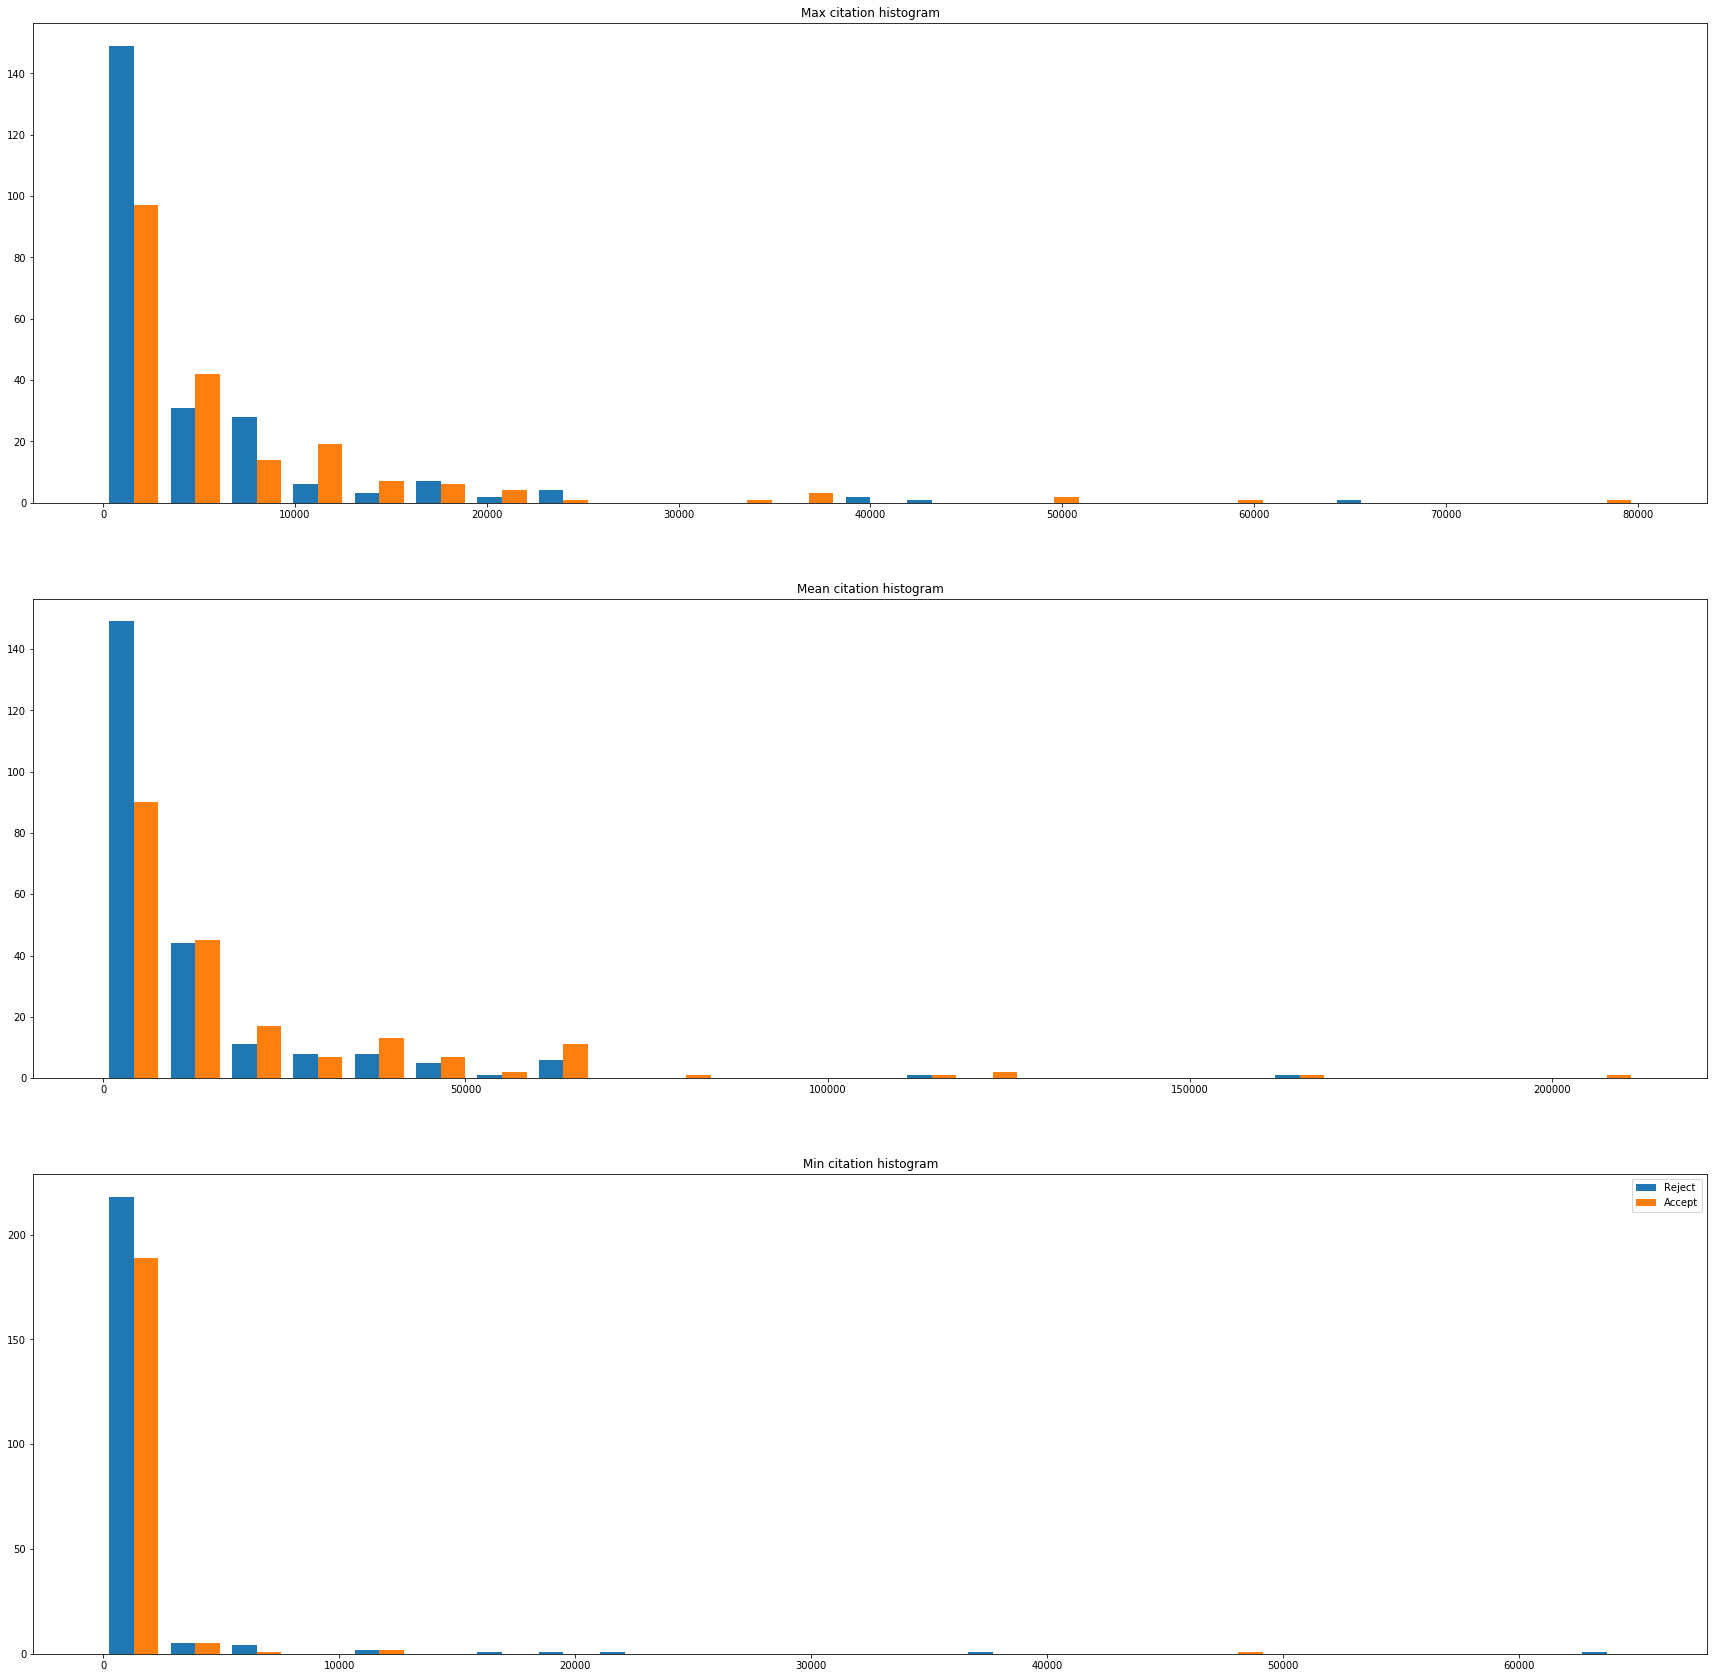

In [36]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(30, 30))

# Max
x1 = sorted(rej_cit[0])
x2 = sorted(acc_cit[0])
n, bins, patches = ax1.hist([x1,x2], bins=25, label=["Reject", "Accept"])
plt.legend(loc='upper right')
ax1.set_title('Max citation histogram')

# Mean
x1 = sorted(rej_cit[1])
x2 = sorted(acc_cit[1])
n, bins, patches = ax2.hist([x1,x2], bins=25, label=["Reject", "Accept"])
plt.legend(loc='upper right')
ax2.set_title('Mean citation histogram')

# Min
x1 = sorted(rej_cit[2])
x2 = sorted(acc_cit[2])
n, bins, patches = ax3.hist([x1,x2], bins=25, label=["Reject", "Accept"])
plt.legend(loc='upper right')
ax3.set_title('Min citation histogram')

plt.show()

# Max, Mean, Min pub count

In [38]:
acc_pub = [[], [], []]
rej_pub = [[], [], []]

for k in org_papers:
    if "gs_pub_stat" in org_papers[k]:
        if org_papers[k]["label"].lower() == "accept":
            acc_pub[0].append(org_papers[k]["gs_pub_stat"][0])
            acc_pub[1].append(org_papers[k]["gs_pub_stat"][1])
            acc_pub[2].append(org_papers[k]["gs_pub_stat"][2])
        elif org_papers[k]["label"].lower() == "reject":
            rej_pub[0].append(org_papers[k]["gs_pub_stat"][0])
            rej_pub[1].append(org_papers[k]["gs_pub_stat"][1])
            rej_pub[2].append(org_papers[k]["gs_pub_stat"][2])

No handles with labels found to put in legend.
No handles with labels found to put in legend.


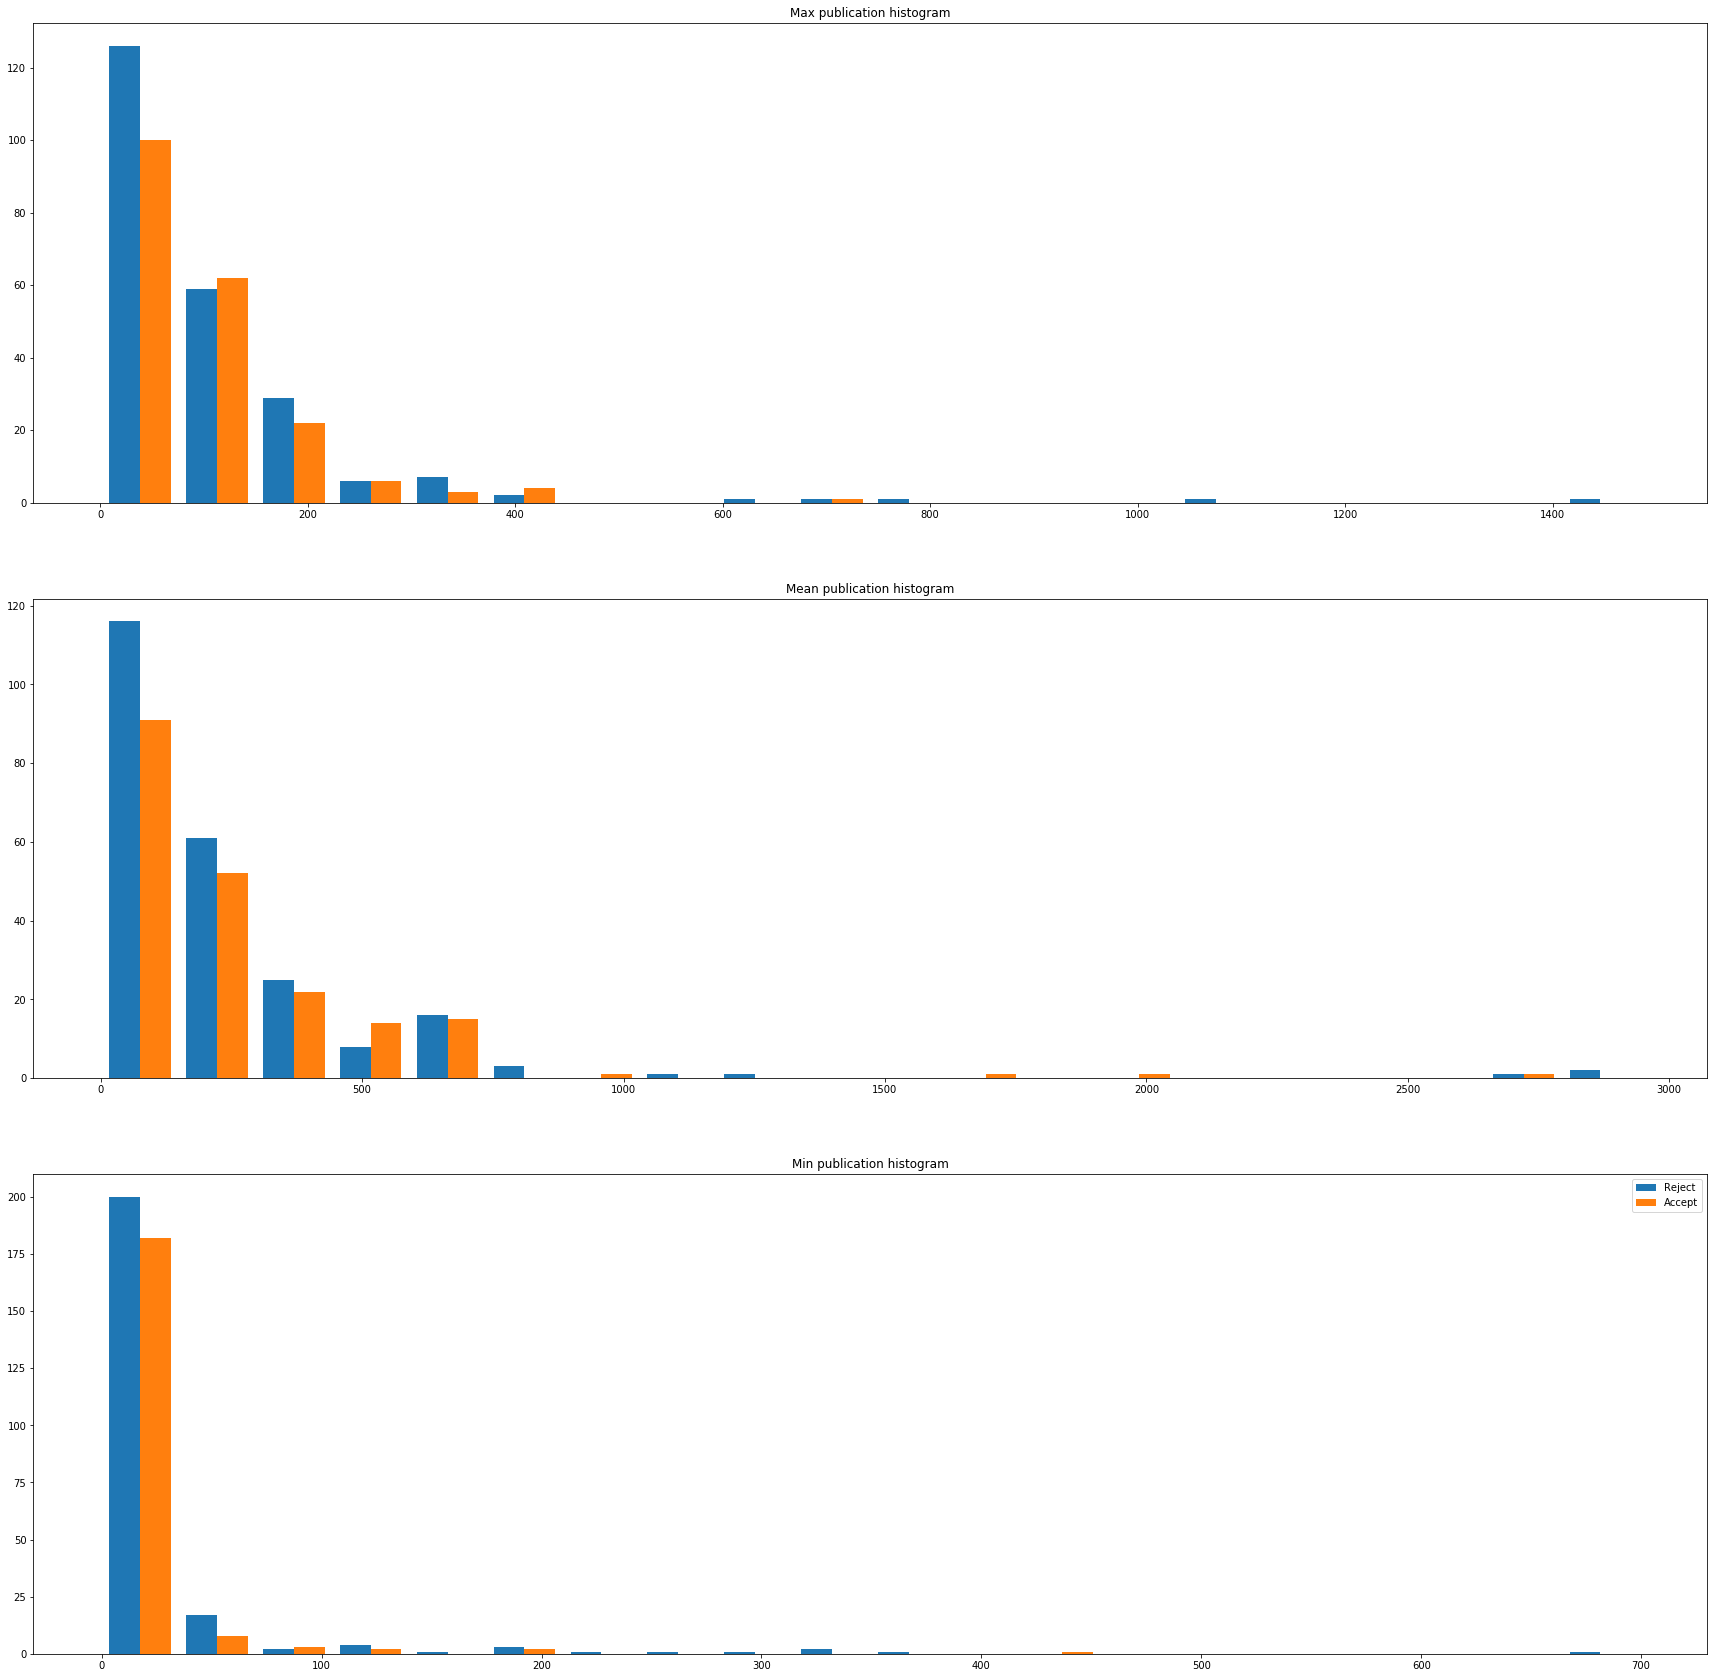

In [39]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(30, 30))

# Max
x1 = sorted(rej_pub[0])
x2 = sorted(acc_pub[0])
n, bins, patches = ax1.hist([x1,x2], bins=20, label=["Reject", "Accept"])
plt.legend(loc='upper right')
ax1.set_title('Max publication histogram')

# Mean
x1 = sorted(rej_pub[1])
x2 = sorted(acc_pub[1])
n, bins, patches = ax2.hist([x1,x2], bins=20, label=["Reject", "Accept"])
plt.legend(loc='upper right')
ax2.set_title('Mean publication histogram')

# Min
x1 = sorted(rej_pub[2])
x2 = sorted(acc_pub[2])
n, bins, patches = ax3.hist([x1,x2], bins=20, label=["Reject", "Accept"])
plt.legend(loc='upper right')
ax3.set_title('Min publication histogram')

plt.show()